In [120]:
import seaborn as sns
import pandas as pd
import sklearn.preprocessing as sklp
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets 

import warnings
warnings.filterwarnings('ignore')

In [121]:
iris = datasets.load_iris()

# Create DataFrame from data and target labels
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target_names[iris.target]


# Visualizing

In [122]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [124]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [125]:
df['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [126]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [127]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [128]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


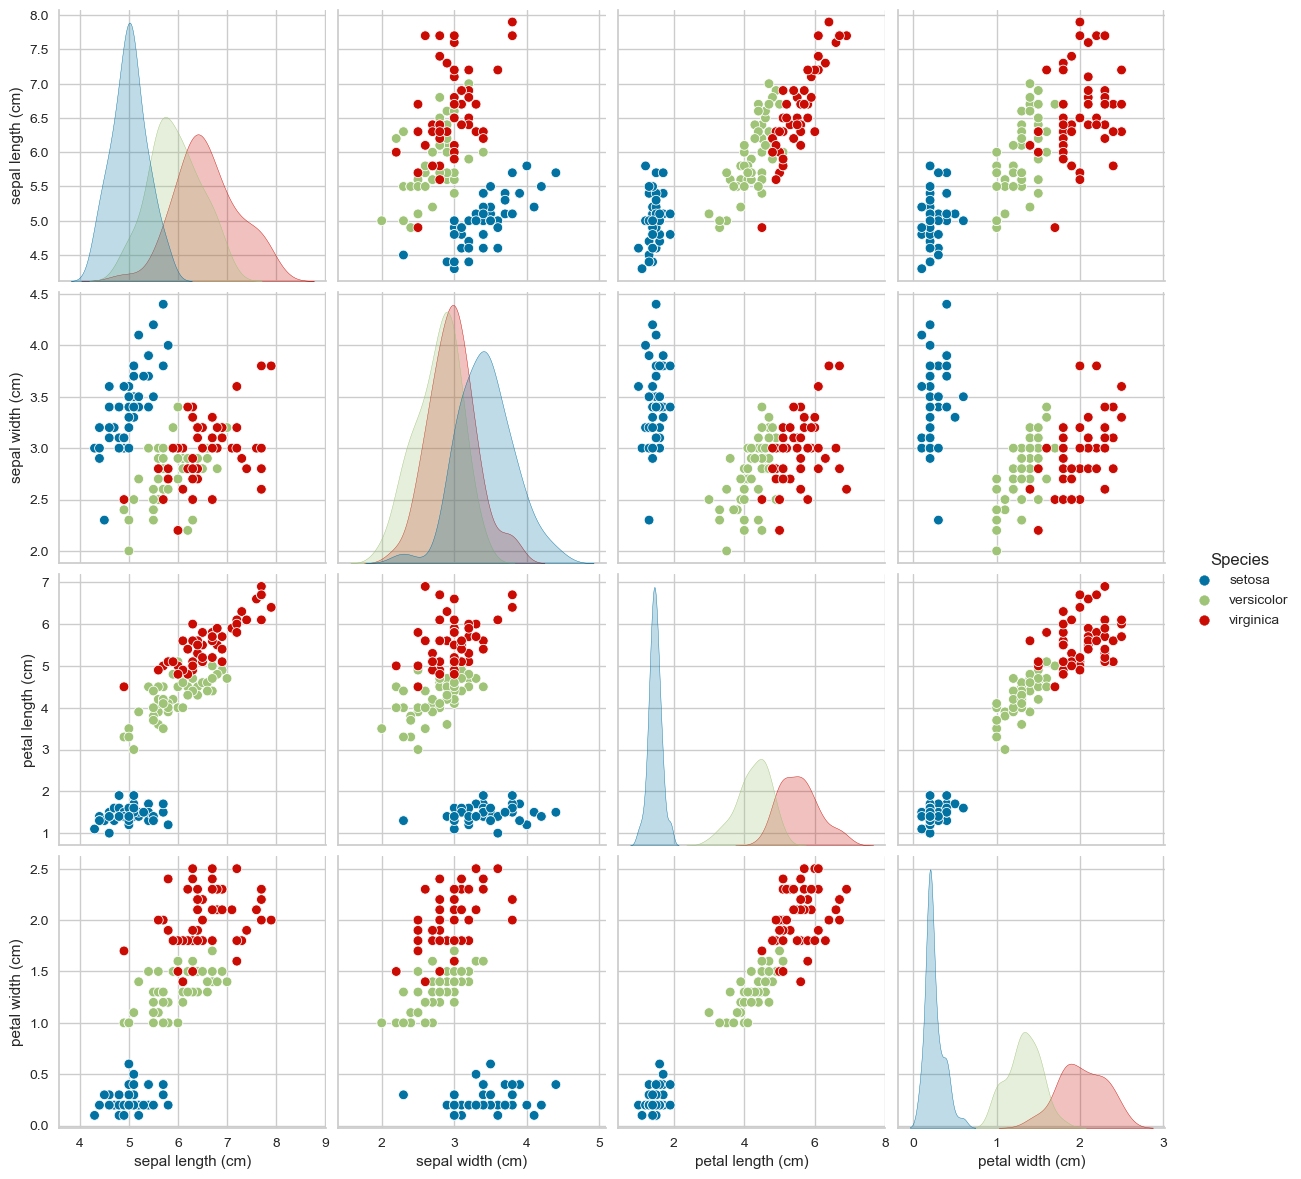

In [129]:
sns.pairplot(df, hue="Species", size=3)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

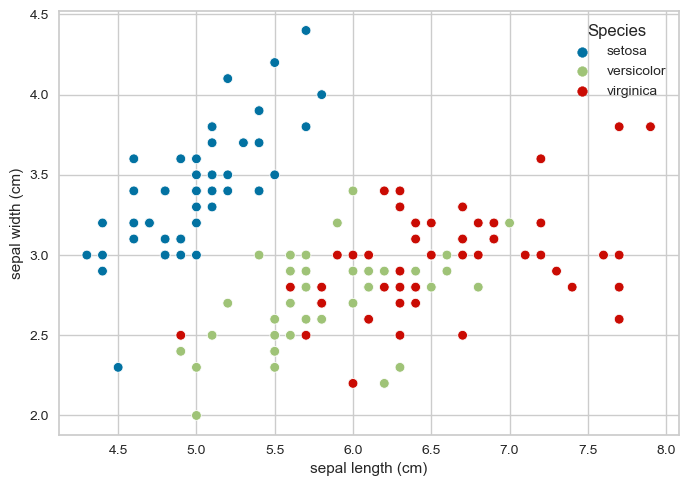

In [130]:
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df.Species)

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

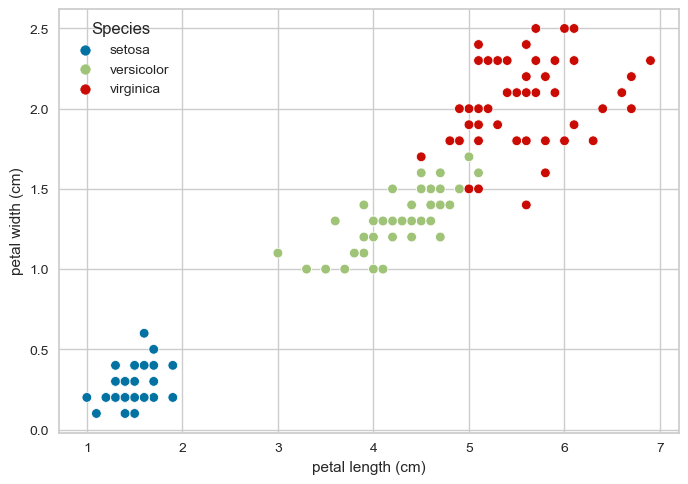

In [131]:
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df.Species)

In [132]:
species = df['Species']
species.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

In [133]:
scaler = StandardScaler()

df = df.drop('Species', axis=1)
df_s = scaler.fit_transform(df)

In [134]:
df_s


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

<Axes: >

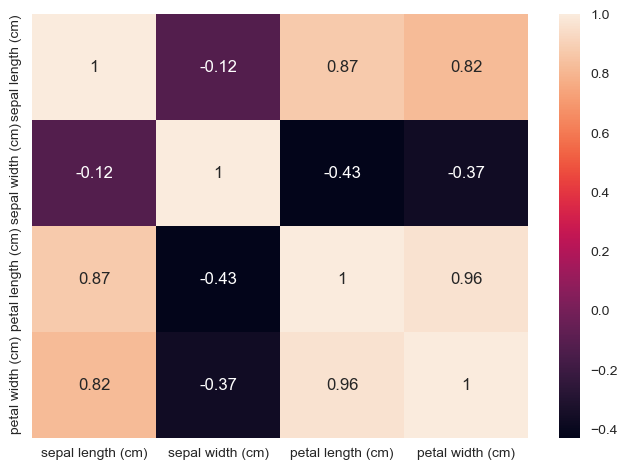

In [135]:
sns.heatmap(df.corr(), annot=True)

In [136]:
scaler = MinMaxScaler()
df_m = scaler.fit_transform(df)

df_m

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [137]:
petalLengthCm = df_m[:,2]
petalLengthCm

array([0.06779661, 0.06779661, 0.05084746, 0.08474576, 0.06779661,
       0.11864407, 0.06779661, 0.08474576, 0.06779661, 0.08474576,
       0.08474576, 0.10169492, 0.06779661, 0.01694915, 0.03389831,
       0.08474576, 0.05084746, 0.06779661, 0.11864407, 0.08474576,
       0.11864407, 0.08474576, 0.        , 0.11864407, 0.15254237,
       0.10169492, 0.10169492, 0.08474576, 0.06779661, 0.10169492,
       0.10169492, 0.08474576, 0.08474576, 0.06779661, 0.08474576,
       0.03389831, 0.05084746, 0.06779661, 0.05084746, 0.08474576,
       0.05084746, 0.05084746, 0.05084746, 0.10169492, 0.15254237,
       0.06779661, 0.10169492, 0.06779661, 0.08474576, 0.06779661,
       0.62711864, 0.59322034, 0.66101695, 0.50847458, 0.61016949,
       0.59322034, 0.62711864, 0.38983051, 0.61016949, 0.49152542,
       0.42372881, 0.54237288, 0.50847458, 0.62711864, 0.44067797,
       0.57627119, 0.59322034, 0.52542373, 0.59322034, 0.49152542,
       0.6440678 , 0.50847458, 0.66101695, 0.62711864, 0.55932

In [138]:
petalWidthCm = df_m[:,3]
petalWidthCm

array([0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.125     , 0.08333333, 0.04166667, 0.04166667, 0.        ,
       0.04166667, 0.04166667, 0.        , 0.        , 0.04166667,
       0.125     , 0.125     , 0.08333333, 0.08333333, 0.08333333,
       0.04166667, 0.125     , 0.04166667, 0.16666667, 0.04166667,
       0.04166667, 0.125     , 0.04166667, 0.04166667, 0.04166667,
       0.04166667, 0.125     , 0.        , 0.04166667, 0.04166667,
       0.04166667, 0.04166667, 0.        , 0.04166667, 0.04166667,
       0.08333333, 0.08333333, 0.04166667, 0.20833333, 0.125     ,
       0.08333333, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.54166667, 0.58333333, 0.58333333, 0.5       , 0.58333333,
       0.5       , 0.625     , 0.375     , 0.5       , 0.54166667,
       0.375     , 0.58333333, 0.375     , 0.54166667, 0.5       ,
       0.54166667, 0.58333333, 0.375     , 0.58333333, 0.41666667,
       0.70833333, 0.5       , 0.58333333, 0.45833333, 0.5    

<Axes: >

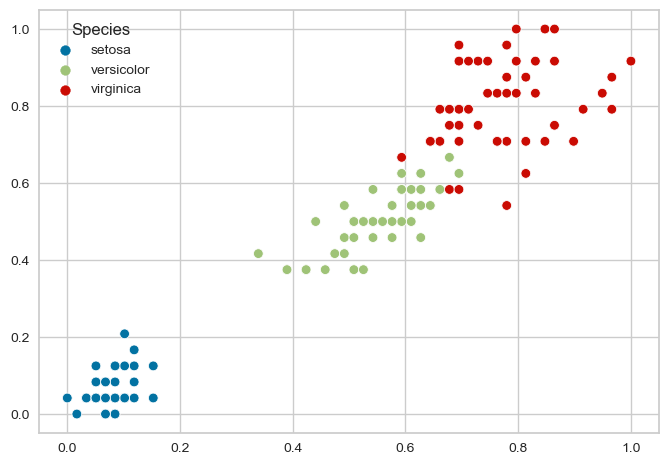

In [139]:
sns.scatterplot(x=petalLengthCm, y=petalWidthCm, hue=species)

# Elbow

In [184]:
n_cluster = range(1,10)
inertia = []

for k in n_cluster:
    km = KMeans(n_clusters = k)
    km.fit(df_m)
    inertia.append(km.inertia_)

In [141]:
inertia

[41.16611042137329,
 12.127790750538196,
 6.982216473785234,
 5.51693347204037,
 4.580948640117294,
 3.941744028592849,
 3.637436463019489,
 3.1339281799370005,
 2.814651949442424]

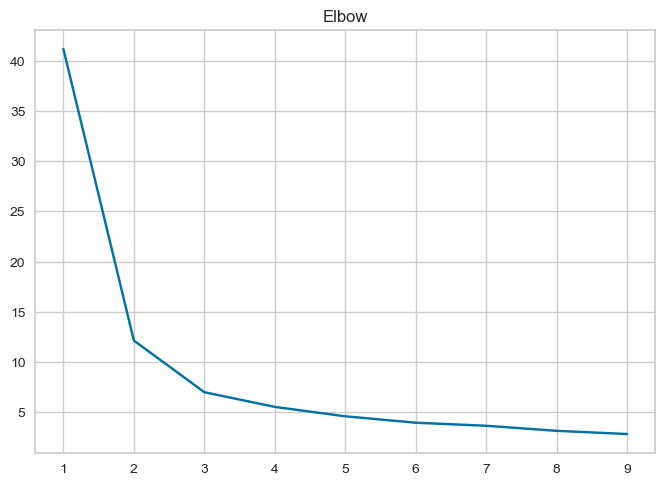

In [142]:
plt.title('Elbow')
plt.plot(n_cluster, inertia)
plt.show()

# Silhouett Score

In [199]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_m)
labels = kmeans.labels_

silhouette_avg = silhouette_score(df_m, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5047687565398589


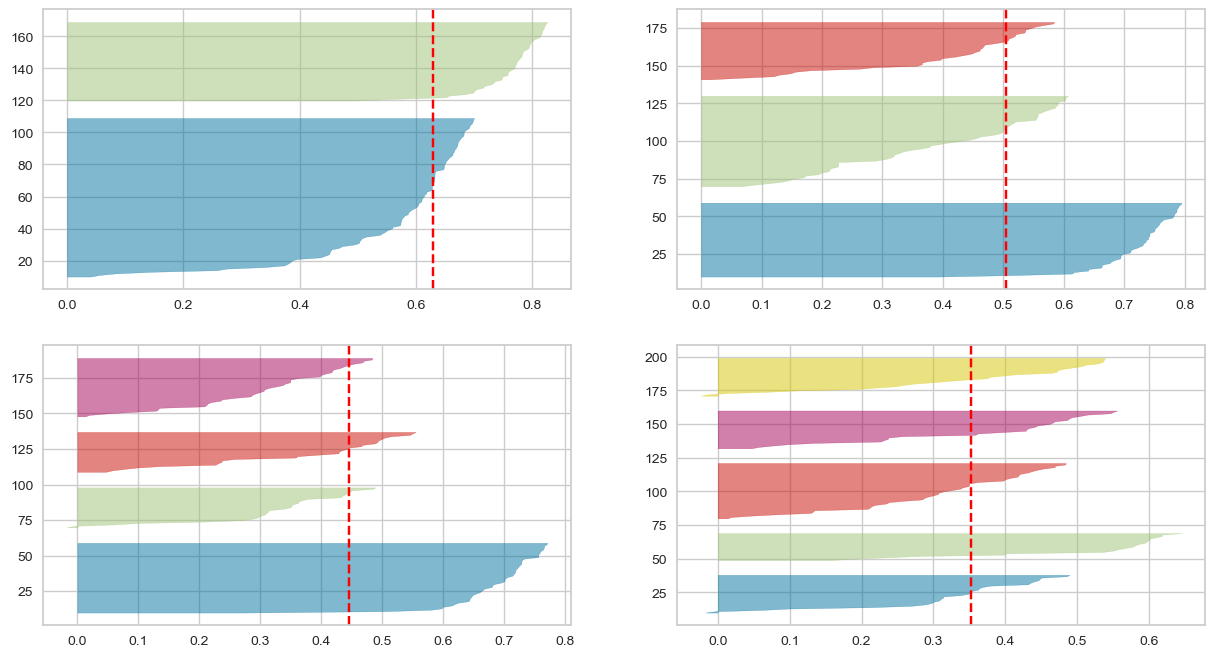

In [198]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_m)

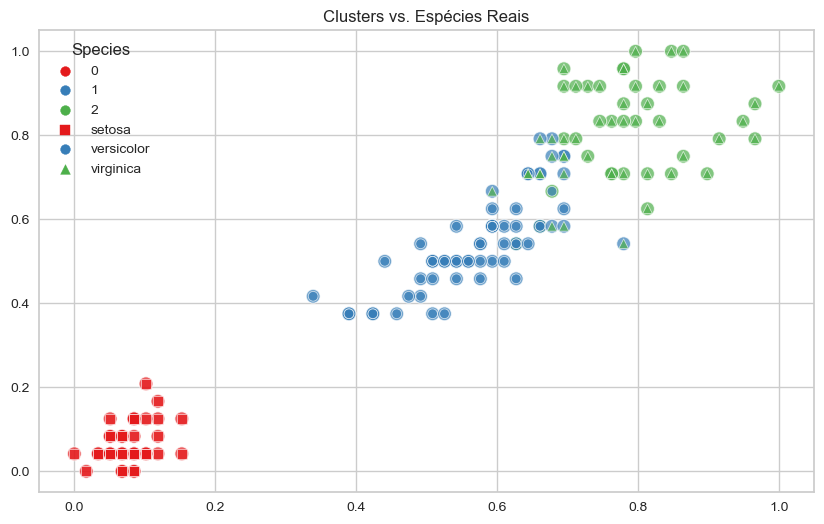

In [211]:
# Gráfico de dispersão com cores diferentes para clusters e espécies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=petalLengthCm, y=petalWidthCm, hue=labels, palette='Set1', legend='full', s=100, marker='o', alpha=0.7)
sns.scatterplot(x=petalLengthCm, y=petalWidthCm, hue=species, style=species, markers={"setosa": "s", "versicolor": "o", "virginica": "^"}, palette='Set1', legend='full', alpha=0.7)

plt.title("Clusters vs. Espécies Reais")
plt.show()


In [205]:
from sklearn.cluster import KMeans

# Ajustar o modelo K-Means com k=3 (já feito)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=42)
kmeans.fit(df_m)

# Encontrar os centróides dos clusters
centroids = kmeans.cluster_centers_

# Descrição dos centróides
for i, centroid in enumerate(centroids):
    print(f"Centróide {i + 1}:")
    for j, feature in enumerate(df.columns[:-2]):
        print(f"{feature}: {centroid[j]}")
    print("\n")


Centróide 1:
sepal length (cm): 0.1961111111111111
sepal width (cm): 0.595
petal length (cm): 0.0783050847457627
petal width (cm): 0.06083333333333335


Centróide 2:
sepal length (cm): 0.4412568306010929
sepal width (cm): 0.3073770491803278
petal length (cm): 0.5757154765212559
petal width (cm): 0.5491803278688525


Centróide 3:
sepal length (cm): 0.7072649572649572
sepal width (cm): 0.4508547008547008
petal length (cm): 0.7970447631464579
petal width (cm): 0.8247863247863247




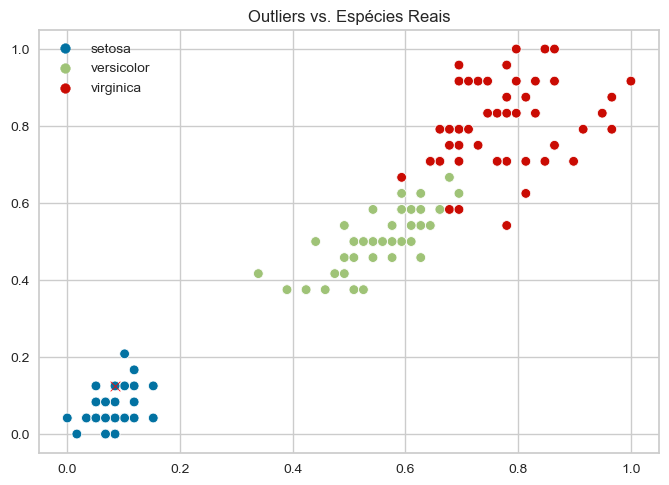

In [207]:
# Plotar os outliers
sns.scatterplot(x=petalLengthCm, y=petalWidthCm, hue=species)
sns.scatterplot(x=petalLengthCm[outlier_indices[0]], y=petalWidthCm[outlier_indices[0]], color='red', marker='x')
plt.title("Outliers vs. Espécies Reais")
plt.show()

# Comparação dos resultados com as espécies reais

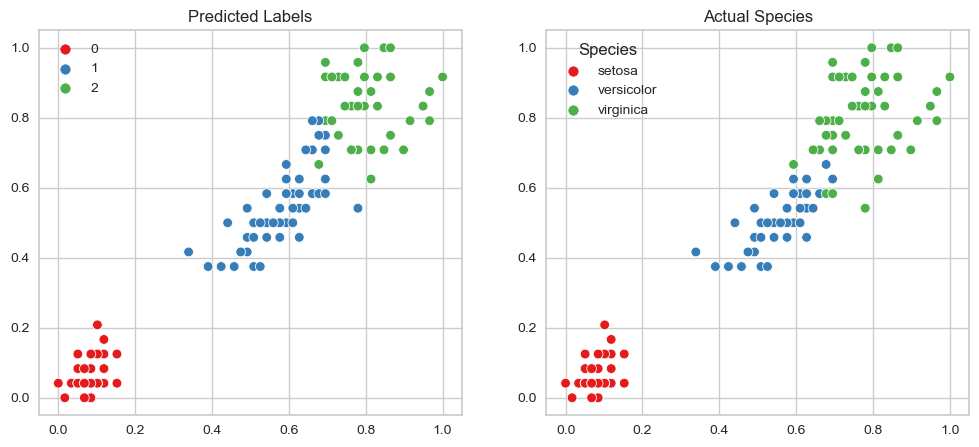

In [145]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot predicted labels
sns.scatterplot(x=petalLengthCm, y=petalWidthCm, hue=labels, palette='Set1', legend='full', data=iris, ax=ax1)
ax1.set_title('Predicted Labels')

# Plot actual species
sns.scatterplot(x=petalLengthCm, y=petalWidthCm, hue=species, palette='Set1', legend='full', data=iris, ax=ax2)
ax2.set_title('Actual Species')

# Show plot
plt.show()

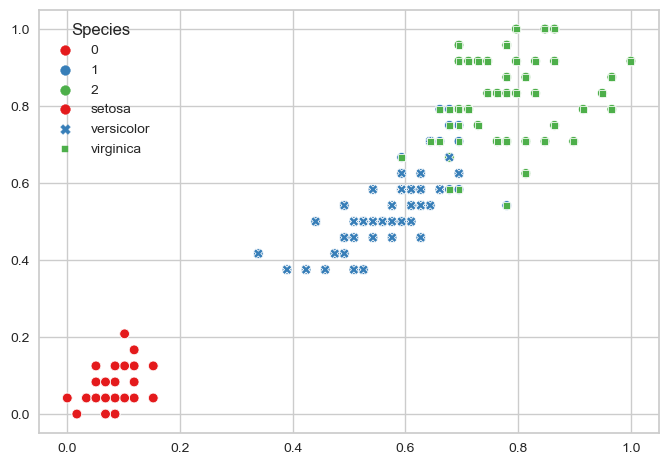

In [181]:
sns.scatterplot(x=petalLengthCm, y=petalWidthCm, hue=labels,palette='Set1', legend='full')
sns.scatterplot(x=petalLengthCm, y=petalWidthCm, hue=species, style=species, palette='Set1', legend='full')

plt.show()

In [150]:
centroids = kmeans.cluster_centers_
centroids

df_centroids = pd.DataFrame(centroids, columns=df.columns)
df_centroids

df_centroids['Species'] = iris.target_names
df_centroids


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,0.196111,0.595000,0.078305,0.060833,setosa
1,0.441257,0.307377,0.575715,0.549180,versicolor
2,0.707265,0.450855,0.797045,0.824786,virginica


Centroid 0: [0.19611111 0.595      0.07830508 0.06083333]
Centroid 1: [0.44125683 0.30737705 0.57571548 0.54918033]
Centroid 2: [0.70726496 0.4508547  0.79704476 0.82478632]


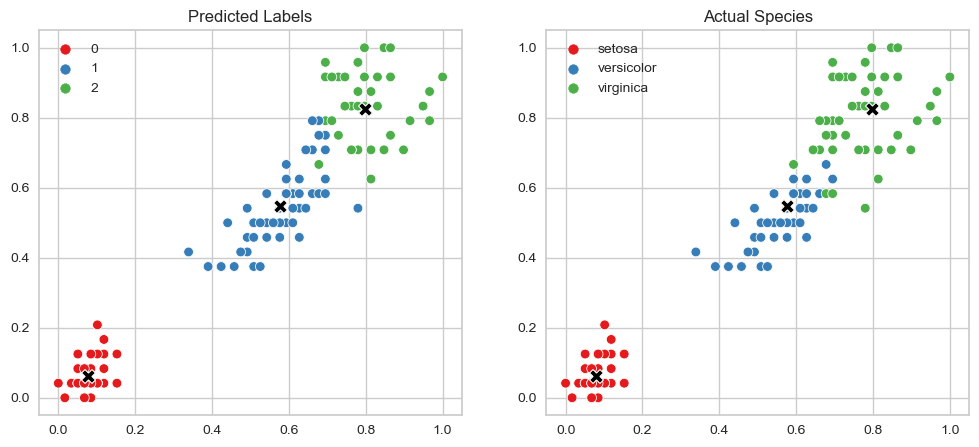

In [155]:
# Descrição dos centróides
for i, centroid in enumerate(centroids):
    print('Centroid {}: {}'.format(i, centroid))

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot predicted labels
sns.scatterplot(x=petalLengthCm, y=petalWidthCm, hue=labels, palette='Set1', legend='full', data=iris, ax=ax1)
sns.scatterplot(x=centroids[:,2], y=centroids[:,3], marker='X', color='black', s=100, ax=ax1)
ax1.set_title('Predicted Labels')

# Plot actual species
sns.scatterplot(x=petalLengthCm, y=petalWidthCm, hue=species, palette='Set1', legend='full', data=iris, ax=ax2)
sns.scatterplot(x=centroids[:,2], y=centroids[:,3], marker='X', color='black', s=100, ax=ax2)
ax2.set_title('Actual Species')

# Show plot
plt.show()


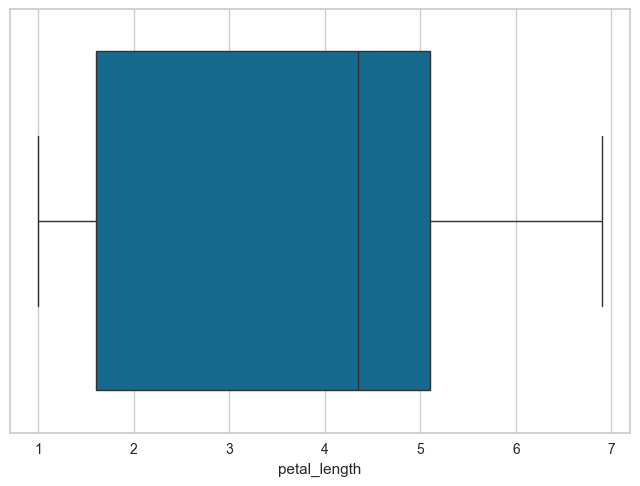

In [ ]:
# Boxplot

# Load iris dataset
iris = sns.load_dataset('iris')

# Create boxplot of petal length
sns.boxplot(x=iris['petal_length'])

# Show plot
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest

# Load iris dataset
iris = sns.load_dataset('iris')

# Create Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.01)

# Fit model to petal length
model.fit(iris[['petal_length']])

# Identify outliers
outliers = iris[model.predict(iris[['petal_length']]) == -1]

# Print outliers
print(outliers)

     sepal_length  sepal_width  petal_length  petal_width    species
22            4.6          3.6           1.0          0.2     setosa
118           7.7          2.6           6.9          2.3  virginica


# Hierarchical Cluster

In [ ]:
n_clusters = 3
agglomerative_clustering = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters)
labels = agglomerative_clustering.fit_predict(df_m)

In [ ]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

# Dendrogram

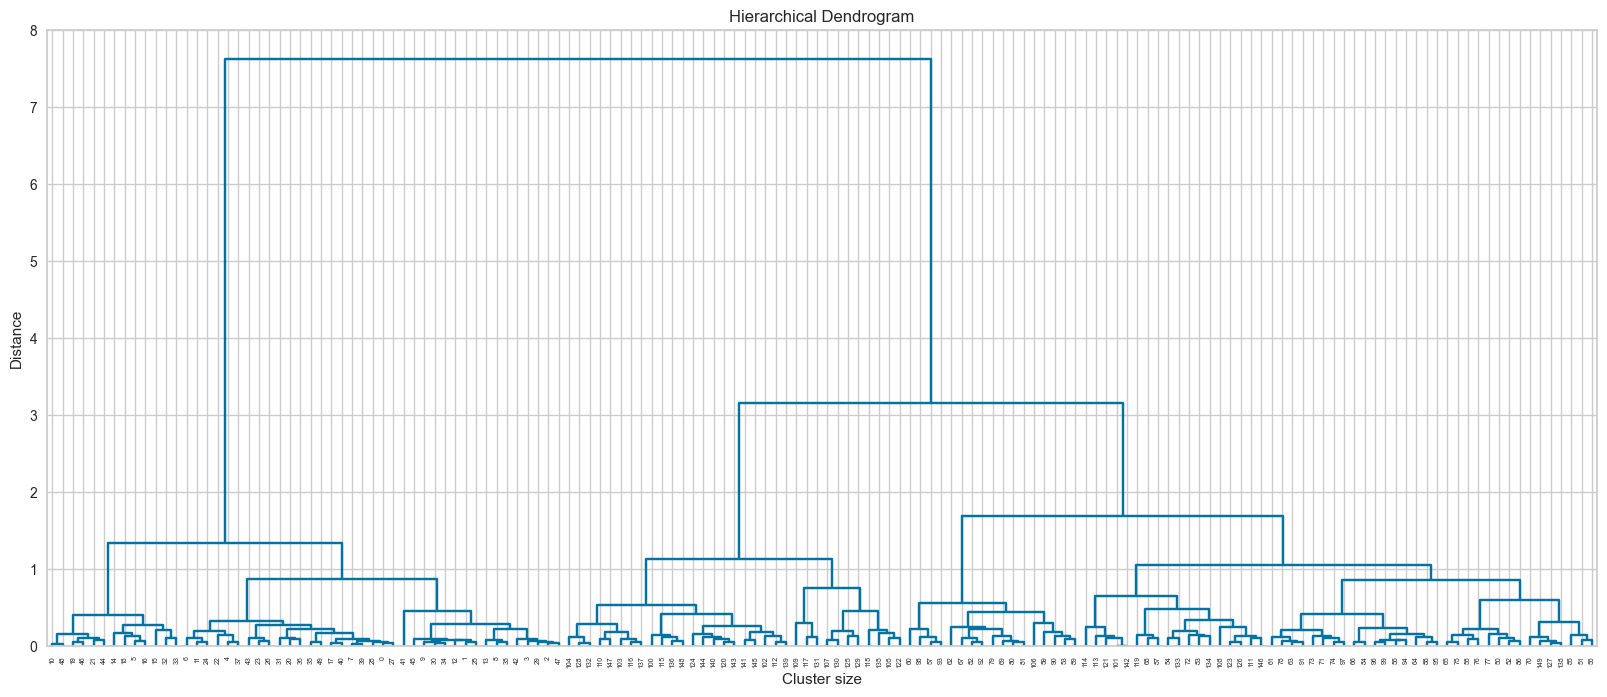

In [ ]:
matrix = linkage(df_m, 'ward')
plot = plt.figure(figsize=(20,8)) # IF DOESN'T FIT IN YOUR DISPLAY, PLEASE CHANGE 20 TO A LOWER NUMBER
dendrogram(matrix, color_threshold=0)
plt.title('Hierarchical Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()